In [3017]:
import json
import numpy as np
import pandas as pd

In [3018]:


# path = "2023_06_24_12:06:54/result_8.json"

path = "2023_06_24_11:48:18/result_4.json"

# path = "2023_06_24_12:21:20/result_9.json"



with open('../EvolutionaryFramework/results/NSGA_II/' + path) as user_file:
  parsed_json = json.load(user_file)
  
# print(json.dumps(parsed_json, indent = 4, sort_keys=True))

In [3019]:
data = []
metaParameters = []
metaDictionary = {}
for elem in parsed_json:
    if elem == "metaParameters":
        metaDictionary = {
            'algorithmName': parsed_json[elem]["algorithmName"],
            'populationSize': parsed_json[elem]["populationSize"],
            'numberOfBars': parsed_json[elem]["numberOfBars"],
            'maxNumberOfNotes': parsed_json[elem]["maxNumberOfNotes"],
            'representationType': parsed_json[elem]["representationType"],
            'melodyKeyValue': parsed_json[elem]["melodyKeyValue"],
            'melodyKeyType': parsed_json[elem]["melodyKeyType"],
            'crossoverProbability': parsed_json[elem]["crossoverProbability"],
            'mutationProbability': parsed_json[elem]["mutationProbability"],
            'selectionType': parsed_json[elem]["selectionType"],
            'matingPoolSelectionType': parsed_json[elem]["matingPoolSelectionType"],
            'numberOfGenerations': parsed_json[elem]["numberOfGenerations"],
            'criteria': parsed_json[elem]["criteria"],
        }
        for key, value in parsed_json[elem]["weightsValues"].items():
            metaDictionary["weightsValues_" + key] = value
        for key, value in parsed_json[elem]["crossoverType"].items():
            metaDictionary["crossoverType_" + key] = value
        for key, value in parsed_json[elem]["mutationType"].items():
            metaDictionary["mutationType_" + key] = value
metaParameters.append(metaDictionary)

metaParameters_df = pd.DataFrame(metaParameters)   


for elem in parsed_json:
        if elem == "experiment":
            for generation in parsed_json[elem]:
                if (generation != "qualityOfPopulation"):
                    for front in parsed_json[elem][generation]:
                        for individual in parsed_json[elem][generation][front]:
                            dictionary = {}
                            dictionary = {
                                'generation': generation,
                                'front': front,
                                'melody': individual['melody'],
                                'penalty': individual['penalty']
                            }
                            
                            for criterion in metaParameters_df['criteria'].values[0]:
                                dictionary[criterion] = individual['fitness'][criterion]
                            data.append(dictionary)
data_df = pd.DataFrame(data)

In [3020]:
data_df.head()

,generation,front,melody,penalty,SIMPLE_AND_OBVIOUS,COMPLICATED_AND_ENIGMATIC
0,generation_99,front_1,61/0.5 73/0.3125 73/0.1875 68/0.3125 61/0.375 ...,0.495387,0.791055,0.593020
1,generation_99,front_1,68/0.5625 61/0.1875 70/0.0625 73/0.125 74/0.06...,0.487558,0.619235,0.770145
2,generation_99,front_1,68/0.5625 61/0.1875 70/0.0625 73/0.125 74/0.06...,0.487558,0.619235,0.770145
3,generation_99,front_1,54/0.5625 61/0.25 73/0.1875 68/0.3125 61/0.437...,0.495518,0.785395,0.611652
4,generation_99,front_1,61/0.5 73/0.3125 73/0.1875 68/0.3125 61/0.4375...,0.495217,0.788204,0.605739


In [3021]:
metaParameters_df.head()

,algorithmName,populationSize,numberOfBars,maxNumberOfNotes,representationType,melodyKeyValue,melodyKeyType,crossoverProbability,mutationProbability,selectionType,...,weightsValues_DESCENDING_MELODY_LINE,weightsValues_NON_PERFECT_INTERVAL,crossoverType_TWO_POINT_CROSSOVER,crossoverType_ONE_POINT_CROSSOVER,crossoverType_MUSICAL_CONTEXT,mutationType_ADD_ZERO,mutationType_SIMPLE,mutationType_BAR_ORDER,mutationType_MUSICAL_CONTEXT,mutationType_ADD_REST
0,NSGA-II,250,4,16,f1,F#,MAJOR,0.8,0.25,,...,3.0,2.0,1.0,2.0,4.0,0.5,2.0,0.0,5.0,0.5


In [3022]:
data_df.head()

,generation,front,melody,penalty,SIMPLE_AND_OBVIOUS,COMPLICATED_AND_ENIGMATIC
0,generation_99,front_1,61/0.5 73/0.3125 73/0.1875 68/0.3125 61/0.375 ...,0.495387,0.791055,0.593020
1,generation_99,front_1,68/0.5625 61/0.1875 70/0.0625 73/0.125 74/0.06...,0.487558,0.619235,0.770145
2,generation_99,front_1,68/0.5625 61/0.1875 70/0.0625 73/0.125 74/0.06...,0.487558,0.619235,0.770145
3,generation_99,front_1,54/0.5625 61/0.25 73/0.1875 68/0.3125 61/0.437...,0.495518,0.785395,0.611652
4,generation_99,front_1,61/0.5 73/0.3125 73/0.1875 68/0.3125 61/0.4375...,0.495217,0.788204,0.605739


In [3023]:
data_df.loc[0]

generation                                                       generation_99
front                                                                  front_1
melody                       61/0.5 73/0.3125 73/0.1875 68/0.3125 61/0.375 ...
penalty                                                               0.495387
SIMPLE_AND_OBVIOUS                                                    0.791055
COMPLICATED_AND_ENIGMATIC                                              0.59302
Name: 0, dtype: object

In [3024]:
# ( fitness - min ) / ( max - min )

weightsMin = 0.0
weightsMax = 14/28

penaltyMin = 0.0
penaltyMax = 14/28

In [3025]:
criteria = metaParameters_df['criteria'].values[0]
for criterion in criteria:
    data_df[criterion] = ( data_df[criterion] - data_df['penalty'] - weightsMin ) / (weightsMax - weightsMin)
data_df['penalty'] = ( data_df['penalty'] - penaltyMin ) / (penaltyMax - penaltyMin)

In [3026]:
data_df.loc[0]

generation                                                       generation_99
front                                                                  front_1
melody                       61/0.5 73/0.3125 73/0.1875 68/0.3125 61/0.375 ...
penalty                                                               0.990774
SIMPLE_AND_OBVIOUS                                                    0.591336
COMPLICATED_AND_ENIGMATIC                                             0.195267
Name: 0, dtype: object

In [3027]:
generation = data_df[data_df["generation"] == "generation_200"].sort_values(by=['front'])

In [3028]:
max_simple = generation.loc[generation['SIMPLE_AND_OBVIOUS'].idxmax()]
print(max_simple)
print(max_simple['melody'])
max_complicated = generation.loc[generation['COMPLICATED_AND_ENIGMATIC'].idxmax()]
print(max_complicated)
print(max_complicated['melody'])



generation                                                      generation_200
front                                                                  front_1
melody                       54/0.5 61/0.0625 61/0.25 73/0.1875 68/0.0625 5...
penalty                                                               0.996599
SIMPLE_AND_OBVIOUS                                                     0.58762
COMPLICATED_AND_ENIGMATIC                                             0.230779
Name: 29750, dtype: object
54/0.5 61/0.0625 61/0.25 73/0.1875 68/0.0625 56/0.6875 68/0.125 75/0.0625 68/0.0625 63/0.875 58/0.0625 70/0.0625 71/0.25 66/0.125 54/0.125 59/0.125 66/0.125 66/0.0625 71/0.0625 59/0.0625 54/0.0625 
generation                                                      generation_200
front                                                                  front_1
melody                       68/0.5625 61/0.1875 70/0.0625 73/0.125 74/0.06...
penalty                                                         

In [3029]:
percent = len(generation['melody'].unique()) / len(generation['melody'])
print(percent)

0.416


In [3030]:
list_of_fronts = []

for front in generation["front"].unique():
    front_elements = []
    front_data = generation[generation["front"] == front]

    penaltyBoolean = False
    front_penalty = []
    for penalty in front_data["penalty"]:
        front_penalty.append(penalty)
    for criterion in metaParameters_df['criteria'].values[0]:
        front_temp = []
        for i, individual in enumerate(front_data[criterion]):
            front_temp.append(individual)
        front_elements.append(front_temp)
    front_elements.append(front_penalty)
    # print(front_elements)
    list_of_fronts.append(front_elements)

In [3031]:
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

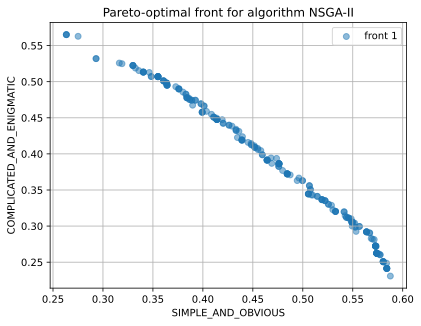

In [3032]:
fig, ax = plt.subplots()
ax.set_title("Pareto-optimal front for algorithm NSGA-II")
for i, criterion in enumerate(metaParameters_df['criteria'].values[0]):
    if i == 0:
        ax.set_xlabel(criterion)
    else:
        ax.set_ylabel(criterion)
ax.grid()

for i, (x,y,z) in enumerate(list_of_fronts):
    ax.scatter(x, y, label = f"front {i+1}", alpha=0.5)


plt.legend()
plt.show()



In [3033]:
from natsort import index_natsorted
list_of_generations = []
data_df = data_df.sort_values(by=['generation'], key = lambda x: np.argsort(index_natsorted(data_df["generation"])))
for generation_name in data_df["generation"].unique():
    list_of_fronts = []
    generation = data_df[data_df["generation"] == generation_name].sort_values(by=['front'])

    generationElements = []
    for criterion in metaParameters_df['criteria'].values[0]:
        criteriaElements = []   
        for individual in generation[criterion]:
            criteriaElements.append(individual)
        # print(criteriaElements)
        generationElements.append(criteriaElements)

    list_of_generations.append(generationElements)


average_generations = np.zeros((len(list_of_generations), len(metaParameters_df['criteria'].values[0])))

for idx, elem in enumerate(list_of_generations):
    temp = np.zeros(len(metaParameters_df['criteria'].values[0]))
    for i, criterion in enumerate(elem):
        temp[i] = np.average(criterion) 
    average_generations[idx] = temp

# print(average_generations)



/var/folders/xt/9n_zwlsd12d73nqvy46sv7dm0000gn/T/ipykernel_3667/2470951745.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(X, rotation=90)


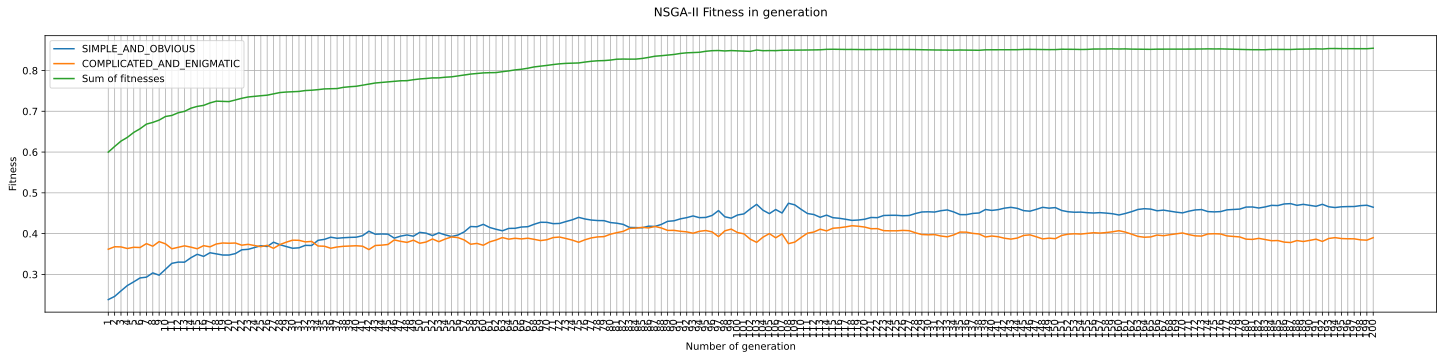

In [3034]:
# print(average_generations[:,i])

X = data_df["generation"].unique()
for i, elem in enumerate(X):
    X[i] = elem[11:]

fig, ax = plt.subplots(figsize=(25,5))
# ax.set_title("NSGA-II Fitness in generation\n" + path)
ax.set_title("NSGA-II Fitness in generation\n")
for i, criterion in enumerate(metaParameters_df['criteria'].values[0]):  
    ax.plot(X, average_generations[:,i], label=criterion)
        
ax.plot(X, average_generations[:,0] + average_generations[:,1], label="Sum of fitnesses")

ax.set_xticklabels(X, rotation=90)

ax.set_xlabel("Number of generation")
ax.set_ylabel("Fitness")

ax.grid()

plt.legend()
plt.show()